In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
# 从CSV文件中读取数据 
df = pd.read_csv("Advertising.CSV")
# 分离特征和目标变量 
X = df.drop('VoxV (vs Li/Li+)', axis=1).values 
y = df['VoxV (vs Li/Li+)']

In [18]:
# 将特征向量转换为多项式特征
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [19]:
# 使用多项式回归模型进行拟合
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [20]:
# 预测新的房屋价格
X_new = X[0].reshape(1, -1)
X_new_poly = poly.transform(X_new)
y_new = model.predict(X_new_poly)

In [24]:
print(X_new_poly)

[[ 1.00000000e+00 -3.41195554e+02 -3.40935369e+02 -3.41259150e+02
   3.30559798e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.16414406e+05
   1.16325632e+05  1.16436105e+05 -1.12785533e+02 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -1.02358666e+03 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -6.82391108e+02
  -3.41195554e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -3.41195554e+02 -0.00000000e+00
  -0.00000000e+00  1.16236926e+05  1.16347314e+05 -1.12699527e+02
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.02280611e+03
  -0.00000

In [25]:
print(y_new)

[5.68005271]


In [21]:
# 计算模型的性能指标
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)

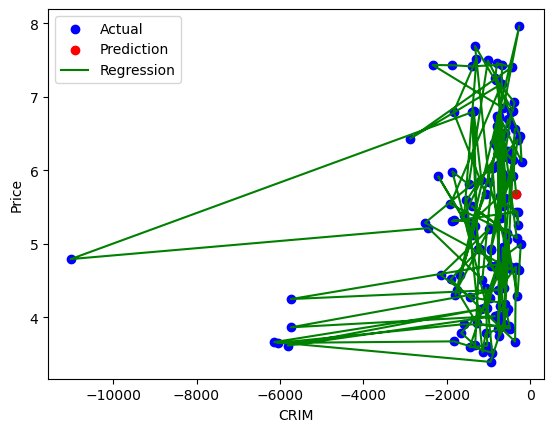

Predicted price for new house: [5.68005271]
Mean Squared Error: 2.338653715551527e-14


In [22]:
# 绘制原始数据散点图和拟合曲线图
plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.scatter(X_new[:, 0], y_new, color='red', label='Prediction')
plt.plot(X[:, 0], y_pred, color='green', label='Regression')
plt.xlabel('CRIM')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f"Predicted price for new house: {y_new}")
print(f"Mean Squared Error: {mse}")